<a href="https://colab.research.google.com/github/davidvela/testColabGH/blob/master/tensorflow_Tutorials.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensorflow Tutorials - Intro

my noes: 
seems like tensorflow examples are getting more and more closed to keros... <br> 
the code seems more simple and with less lines. <br> 
the question is if it will affect performance and if keras has all the objects and all the customization from the old tensorflow libraries... (tf.layers ... )

##### Copyright 2018 The TensorFlow Authors.

In [0]:
# Copyright 2018 The TensorFlow Hub Authors. All Rights Reserved.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
# ==============================================================================

In [0]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [0]:
#@title MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.

# Fashion MNIST dataset
Train your first neural network: basic classification
 

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/keras/basic_classification"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/models/blob/master/samples/core/tutorials/keras/basic_classification.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/models/blob/master/samples/core/tutorials/keras/basic_classification.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

This guide uses [tf.keras](https://www.tensorflow.org/guide/keras), a high-level API to build and train models in TensorFlow.

This guide uses the [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels), as seen here:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Fashion MNIST is intended as a drop-in replacement for the classic [MNIST](http://yann.lecun.com/exdb/mnist/) dataset—often used as the "Hello, World" of machine learning programs for computer vision. The MNIST dataset contains images of handwritten digits (0, 1, 2, etc) in an identical format to the articles of clothing we'll use here.

This guide uses Fashion MNIST for variety, and because it's a slightly more challenging problem than regular MNIST. Both datasets are relatively small and are used to verify that an algorithm works as expected. They're good starting points to test and debug code. 

We will use 60,000 images to train the network and 10,000 images to evaluate how accurately the network learned to classify images. You can access the Fashion MNIST directly from TensorFlow, just import and load the data:

In [0]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.9.0


In [0]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
#      0             1          2          3       4         5        6       7         8       9
# 'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'

## Explore the data

Let's explore the format of the dataset before training the model. The following shows there are 60,000 images in the training set, with each image represented as 28 x 28 pixels:

In [0]:
print(train_images.shape) 
print(len(train_labels))
print(train_labels)
print(test_images.shape)
print(len(test_labels))

## Preprocess the data

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

In [0]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.gca().grid(False)
# scale values from 0 to 1. 
train_images = train_images / 255.0
test_images = test_images / 255.0

Display the first 25 images from the *training set* and display the class name below each image. Verify that the data is in the correct format and we're ready to build and train the network.

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

## Build the model

Building the neural network requires configuring the layers of the model, then compiling the model.

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
# train the model: 
model.fit(train_images, train_labels, epochs=5)

# Evaluate the model: 
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)
#  This model reaches an accuracy of about 0.88 (or 88%) on the training data.

# Testing
predictions = model.predict(test_images)

# examples: 
print(predictions[0])
print(np.argmax(predictions[0]))

In [0]:
test_labels[0]

## Make predictions

With the model trained, we can use it to make predictions about some images.

Let's plot several images with their predictions. Correct prediction labels are green and incorrect prediction labels are red.

In [0]:
# Plot the first 25 test images, their predicted label, and the true label
# Color correct predictions in green, incorrect predictions in red
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    if predicted_label == true_label:
      color = 'green'
    else:
      color = 'red'
    plt.xlabel("{} ({})".format(class_names[predicted_label], 
                                  class_names[true_label]),
                                  color=color)
      

Finally, use the trained model to make a prediction about a single image. 

In [0]:
# Grab an image from the test dataset
img = test_images[0]
print(img.shape)
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))
print(img.shape)

Now predict the image:

In [0]:
predictions = model.predict(img)
print(predictions)
prediction = predictions[0]
np.argmax(prediction)

# The Boston Housing Prices dataset

In [0]:
# ... 

# Neural Machine Translation with Attention
   <table class="tfo-notebook-buttons" align="left"><td>
      <a target="_blank"  href="https://colab.sandbox.google.com/github/tensorflow/tensorflow/blob/master/tensorflow/contrib/eager/python/examples/nmt_with_attention/nmt_with_attention.ipynb">
      <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />
        <span>Run in Google Colab</span></a>  
        </td><td>
        <a target="_blank"  href="https://github.com/tensorflow/tensorflow/tree/master/tensorflow/contrib/eager/python/examples/nmt_with_attention/nmt_with_attention.ipynb"><img width=32px src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" /><span>View source on GitHub</span></a></td>
</table>

In [0]:
# ... 

In [0]:
from __future__ import absolute_import, division, print_function

# Import TensorFlow >= 1.9 and enable eager execution
import tensorflow as tf

tf.enable_eager_execution()

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import unicodedata
import re
import numpy as np
import os
import time
print(tf.__version__)

# TensorflowHub  (TH)
  https://www.tensorflow.org/hub/ <br>
  modules: https://www.tensorflow.org/hub/modules/google/imagenet/inception_resnet_v2/classification/1
  

##   example: <br>

```
import tensorflow as tf
import tensorflow_hub as hub

with tf.Graph().as_default():
  module_url = "https://tfhub.dev/google/nnlm-en-dim128-with-normalization/1"
  embed = hub.Module(module_url)
  embeddings = embed(["A long sentence.", "single-word",      "http://example.com"])

  with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    sess.run(tf.tables_initializer())

    print(sess.run(embeddings))
    ```

## nnlm-en-dim128-with-normalization

In [0]:
# https://www.tensorflow.org/hub/

import tensorflow as tf
import tensorflow_hub as hub

with tf.Graph().as_default():
  module_url = "https://tfhub.dev/google/nnlm-en-dim128-with-normalization/1"
  embed = hub.Module(module_url)
  embeddings = embed(["A long sentence.", "single-word",
                      "http://example.com"])

  with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    sess.run(tf.tables_initializer())

    print(sess.run(embeddings))


INFO:tensorflow:Using /tmp/tfhub_modules to cache modules.
INFO:tensorflow:Downloading TF-Hub Module 'https://tfhub.dev/google/nnlm-en-dim128-with-normalization/1'.
INFO:tensorflow:Downloaded TF-Hub Module 'https://tfhub.dev/google/nnlm-en-dim128-with-normalization/1'.
INFO:tensorflow:Initialize variable module/embeddings/part_0:0 from checkpoint b'/tmp/tfhub_modules/2cdbcae1a547f4fb93475d4b7d4140f8590995b7/variables/variables' with embeddings
[[ 1.27072588e-01  1.70752838e-01 -9.90944505e-02  7.04903603e-02
   2.26204265e-02 -8.07912350e-02  1.34882599e-01  9.98359919e-02
  -9.38840210e-02  1.57970995e-01  1.49555340e-01 -7.23052993e-02
   2.82968562e-02 -7.33467517e-03  7.44888186e-02 -2.56097335e-02
   1.71663105e-01 -2.87602507e-02  5.61525524e-02  1.13487214e-01
  -1.64960790e-02 -6.53510634e-03 -2.56301146e-02 -8.42670649e-02
   8.53472874e-02 -5.40463366e-02  7.97923282e-02 -1.38562024e-01
  -1.34141564e-01 -7.57983997e-02 -9.42738429e-02 -7.67866522e-02
  -1.52945921e-01  1.805

## img. class - inception_resnet_v2

In [0]:
module = hub.Module("https://tfhub.dev/google/imagenet/inception_resnet_v2/classification/1")
height, width = hub.get_expected_image_size(module)
images = ...  # A batch of images with shape [batch_size, height, width, 3].
logits = module(images)  # Logits with shape [batch_size, num_classes].

## IMG retraining
https://www.tensorflow.org/hub/tutorials/image_retraining 

# TH - text classification tutorial
<table align="left"><td>
  <a target="_blank"  href="https://colab.research.google.com/github/tensorflow/hub/blob/master/docs/tutorials/text_classification_with_tf_hub.ipynb">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab
  </a>
</td><td>
  <a target="_blank"  href="https://github.com/tensorflow/hub/blob/master/docs/tutorials/text_classification_with_tf_hub.ipynb">
    <img width=32px src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
</td></table>
<br><br><br>

data:  [Large Movie Review Dataset v1.0](http://ai.stanford.edu/~amaas/data/sentiment/) 

The dataset consists of IMDB movie reviews labeled by positivity from 1 to 10. 

The task is to label the reviews as **negative** or **positive**.


In [0]:
# >>> Preparing environment
# Install the latest Tensorflow version.
!pip install --quiet "tensorflow>=1.7"
# Install TF-Hub.
!pip install tensorflow-hub
!pip install seaborn


# >>>>> import libraries
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns


In [0]:
# data:  
# Load all files from a directory in a DataFrame.
def load_directory_data(directory):
  data = {}
  data["sentence"] = []
  data["sentiment"] = []
  for file_path in os.listdir(directory):
    with tf.gfile.GFile(os.path.join(directory, file_path), "r") as f:
      data["sentence"].append(f.read())
      data["sentiment"].append(re.match("\d+_(\d+)\.txt", file_path).group(1))
  return pd.DataFrame.from_dict(data)

# Merge positive and negative examples, add a polarity column and shuffle.
def load_dataset(directory):
  pos_df = load_directory_data(os.path.join(directory, "pos"))
  neg_df = load_directory_data(os.path.join(directory, "neg"))
  pos_df["polarity"] = 1
  neg_df["polarity"] = 0
  return pd.concat([pos_df, neg_df]).sample(frac=1).reset_index(drop=True)

# Download and process the dataset files.
def download_and_load_datasets(force_download=False):
  dataset = tf.keras.utils.get_file(
      fname="aclImdb.tar.gz", 
      origin="http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz", 
      extract=True)
  
  train_df = load_dataset(os.path.join(os.path.dirname(dataset), "aclImdb", "train"))
  test_df = load_dataset(os.path.join(os.path.dirname(dataset), "aclImdb", "test"))
  
  return train_df, test_df

# Reduce logging output.
tf.logging.set_verbosity(tf.logging.ERROR)

train_df, test_df = download_and_load_datasets()
train_df.head()

## Model
**Input functions** 
[Estimator framework](https://www.tensorflow.org/get_started/premade_estimators#overview_of_programming_with_estimators) provides [input functions](https://www.tensorflow.org/api_docs/python/tf/estimator/inputs/pandas_input_fn) that wrap Pandas dataframes.

**  Feature columns ** 

TF-Hub provides a [feature column](https://github.com/tensorflow/hub/blob/master/docs/api_docs/python/hub/text_embedding_column.md) that applies a module on the given text feature and passes further the outputs of the module. In this tutorial we will be using the [nnlm-en-dim128 module](https://tfhub.dev/google/nnlm-en-dim128/1). For the purpose of this tutorial, the most important facts are:

* The module takes **a batch of sentences in a 1-D tensor of strings** as input.
* The module is responsible for **preprocessing of sentences** (e.g. removal of punctuation and splitting on spaces).
* The module works with any input (e.g. **nnlm-en-dim128** hashes words not present in vocabulary into ~20.000 buckets).

**  Estimator**  For classification we can use a [DNN Classifier](https://www.tensorflow.org/api_docs/python/tf/estimator/DNNClassifier) (note further remarks about different modelling of the label function at the end of the tutorial).

In [0]:
# Training input on the whole training set with no limit on training epochs.
train_input_fn = tf.estimator.inputs.pandas_input_fn(
    train_df, train_df["polarity"], num_epochs=None, shuffle=True)

# Prediction on the whole training set.
predict_train_input_fn = tf.estimator.inputs.pandas_input_fn(
    train_df, train_df["polarity"], shuffle=False)
# Prediction on the test set.
predict_test_input_fn = tf.estimator.inputs.pandas_input_fn(
    test_df, test_df["polarity"], shuffle=False)

embedded_text_feature_column = hub.text_embedding_column(
    key="sentence", 
    module_spec="https://tfhub.dev/google/nnlm-en-dim128/1")

#>>> estimator 
estimator = tf.estimator.DNNClassifier(
    hidden_units=[500, 100],
    feature_columns=[embedded_text_feature_column],
    n_classes=2,
    optimizer=tf.train.AdagradOptimizer(learning_rate=0.003))


In [0]:
#>>> training 
# Training for 1,000 steps means 128,000 training examples with the default
# batch size. This is roughly equivalent to 5 epochs since the training dataset
# contains 25,000 examples.
estimator.train(input_fn=train_input_fn, steps=1000);



In [0]:
#>>>> new data 
test_df  # .columns # Index(['sentence', 'sentiment', 'polarity'], dtype='object')
d =  { 'sentence': ['I liked the movie', 
                    'I hate the movie', 
                    'I like the movie but I hate the book', 
                    'I dont like the book ',
                    'I loved it'], 
      'sentiment': [8, 1, 6, 7, 9], 
      'polarity': [1, 0, 1, 1, 1] }


new_df = pd.DataFrame(data=d)
# new_df

predict_new_input_fn = tf.estimator.inputs.pandas_input_fn(
    new_df, new_df["polarity"], shuffle=False)

# new_eval_result = estimator.evaluate(input_fn=predict_new_input_fn)
new_pred_result = estimator.predict(input_fn=predict_new_input_fn)

# template = ('\nPrediction is "{}" ({:.1f}%), expected "{}"')
# print(template.format(iris_data.SPECIES[class_id],
#                       100 * probability, expec))

for pred_dict in zip(new_pred_result): 
  print( pred_dict )
  print( pred_dict[0]["probabilities"]  )
#   print( "prob to be 0: {} " .format( pred_dict["probabilities"][0] ) )


({'logits': array([0.50863874], dtype=float32), 'logistic': array([0.6244873], dtype=float32), 'probabilities': array([0.3755127, 0.6244873], dtype=float32), 'class_ids': array([1]), 'classes': array([b'1'], dtype=object)},)
[0.3755127 0.6244873]
({'logits': array([-1.4487605], dtype=float32), 'logistic': array([0.19019239], dtype=float32), 'probabilities': array([0.8098076 , 0.19019239], dtype=float32), 'class_ids': array([0]), 'classes': array([b'0'], dtype=object)},)
[0.8098076  0.19019239]
({'logits': array([-1.1281308], dtype=float32), 'logistic': array([0.24450624], dtype=float32), 'probabilities': array([0.7554938 , 0.24450622], dtype=float32), 'class_ids': array([0]), 'classes': array([b'0'], dtype=object)},)
[0.7554938  0.24450622]
({'logits': array([-1.1511269], dtype=float32), 'logistic': array([0.24028333], dtype=float32), 'probabilities': array([0.7597167 , 0.24028333], dtype=float32), 'class_ids': array([0]), 'classes': array([b'0'], dtype=object)},)
[0.7597167  0.2402833

In [0]:
print(d['sentence'][0])
print(new_df[0])

In [0]:
#>>> Predictions
train_eval_result = estimator.evaluate(input_fn=predict_train_input_fn)
test_eval_result = estimator.evaluate(input_fn=predict_test_input_fn)

print("Training set accuracy: {accuracy}".format(**train_eval_result))
print("Test set accuracy: {accuracy}".format(**test_eval_result))

Training set accuracy: 0.7991600036621094
Test set accuracy: 0.7907199859619141


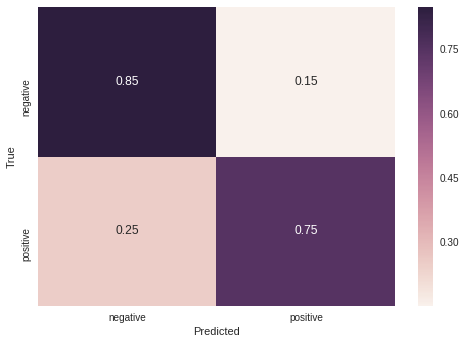

In [0]:
# confusion matrix: 
def get_predictions(estimator, input_fn):
  return [x["class_ids"][0] for x in estimator.predict(input_fn=input_fn)]

LABELS = [
    "negative", "positive"
]

# Create a confusion matrix on training data.
with tf.Graph().as_default():
  cm = tf.confusion_matrix(train_df["polarity"], 
                           get_predictions(estimator, predict_train_input_fn))
  with tf.Session() as session:
    cm_out = session.run(cm)

# Normalize the confusion matrix so that each row sums to 1.
cm_out = cm_out.astype(float) / cm_out.sum(axis=1)[:, np.newaxis]

sns.heatmap(cm_out, annot=True, xticklabels=LABELS, yticklabels=LABELS);
plt.xlabel("Predicted");
plt.ylabel("True");

# Further improvements

1. **Regression on sentiment**: we used a classifier to assign each example into a polarity class. But we actually have another categorical feature at our disposal - sentiment. Here classes actually represent a scale and the underlying value (positive/negative) could be well mapped into a continuous range. We could make use of this property by computing a regression ([DNN Regressor](https://www.tensorflow.org/api_docs/python/tf/contrib/learn/DNNRegressor)) instead of a classification ([DNN Classifier](https://www.tensorflow.org/api_docs/python/tf/contrib/learn/DNNClassifier)).
2. **Larger module**: for the purposes of this tutorial we used a small module to restrict the memory use. There are modules with larger vocabularies and larger embedding space that could give additional accuracy points.
3. **Parameter tuning**: we can improve the accuracy by tuning the meta-parameters like the learning rate or the number of steps, especially if we use a different module. A validation set is very important if we want to get any reasonable results, because it is very easy to set-up a model that learns to predict the training data without generalizing well to the test set.
4. **More complex model**: we used a module that computes a sentence embedding by embedding each individual word and then combining them with average. One could also use a sequential module (e.g. [Universal Sentence Encoder](https://tfhub.dev/google/universal-sentence-encoder/2) module) to better capture the nature of sentences. Or an ensemble of two or more TF-Hub modules.
5. **Regularization**: to prevent overfitting, we could try to use an optimizer that does some sort of regularization, for example [Proximal Adagrad Optimizer](https://www.tensorflow.org/api_docs/python/tf/train/ProximalAdagradOptimizer).

# Advanced: Transfer learning analysis

Transfer learning makes it possible to **save training resources** and to achieve good model generalization even when **training on a small dataset**. In this part, we will demonstrate this by training with two different TF-Hub modules:

* **[nnlm-en-dim128](https://tfhub.dev/google/nnlm-en-dim128/1)** - pretrained text embedding module,
* **[random-nnlm-en-dim128](https://tfhub.dev/google/random-nnlm-en-dim128/1)** - text embedding module that has same vocabulary and network as **nnlm-en-dim128**, but the weights were just randomly initialized and never trained on real data.

And by training in two modes: 

* training **only the classifier** (i.e. freezing the module), and 
* training the **classifier together with the module**.

Let's run a couple of trainings and evaluations to see how using a various modules can affect the accuracy.

In [0]:
def train_and_evaluate_with_module(hub_module, train_module=False):
  embedded_text_feature_column = hub.text_embedding_column(
      key="sentence", module_spec=hub_module, trainable=train_module)

  estimator = tf.estimator.DNNClassifier(
      hidden_units=[500, 100],
      feature_columns=[embedded_text_feature_column],
      n_classes=2,
      optimizer=tf.train.AdagradOptimizer(learning_rate=0.003))

  estimator.train(input_fn=train_input_fn, steps=1000)

  train_eval_result = estimator.evaluate(input_fn=predict_train_input_fn)
  test_eval_result = estimator.evaluate(input_fn=predict_test_input_fn)

  training_set_accuracy = train_eval_result["accuracy"]
  test_set_accuracy = test_eval_result["accuracy"]

  return {
      "Training accuracy": training_set_accuracy,
      "Test accuracy": test_set_accuracy
  }


results = {}
results["nnlm-en-dim128"] = train_and_evaluate_with_module(
    "https://tfhub.dev/google/nnlm-en-dim128/1")
results["nnlm-en-dim128-with-module-training"] = train_and_evaluate_with_module(
    "https://tfhub.dev/google/nnlm-en-dim128/1", True)
results["random-nnlm-en-dim128"] = train_and_evaluate_with_module(
    "https://tfhub.dev/google/random-nnlm-en-dim128/1")
results["random-nnlm-en-dim128-with-module-training"] = train_and_evaluate_with_module(
    "https://tfhub.dev/google/random-nnlm-en-dim128/1", True)

In [0]:
pd.DataFrame.from_dict(results, orient="index")

Training accuracy  Test accuracy
nnlm-en-dim128                                        0.80280        0.79460
nnlm-en-dim128-with-module-training                   0.95128        0.87140
random-nnlm-en-dim128                                 0.71920        0.67704
random-nnlm-en-dim128-with-module-training            0.76648        0.71956

In [0]:
estimator.evaluate(input_fn=predict_test_input_fn)["accuracy_baseline"]

0.5

In [0]:
estimator.evaluate(input_fn=predict_test_input_fn)

{'accuracy': 0.79072,
 'accuracy_baseline': 0.5,
 'auc': 0.8763104,
 'auc_precision_recall': 0.8787724,
 'average_loss': 0.44577765,
 'global_step': 1000,
 'label/mean': 0.5,
 'loss': 56.859394,
 'precision': 0.8274464,
 'prediction/mean': 0.46147138,
 'recall': 0.73464}

Assigning the most represented class will give us accuracy of **50%**. There are a couple of things to notice here:

1. Maybe surprisingly, **a model can still be learned on top of fixed, random embeddings**. The reason is that even if every word in the dictionary is mapped to a random vector, the estimator can separate the space purely using its fully connected layers.
2. Allowing training of the module with **random embeddings** increases both training and test accuracy as oposed to training just the classifier.
3. Training of the module with **pre-trained embeddings** also increases both accuracies. Note however the overfitting on the training set. Training a pre-trained module can be dangerous even with regularization in the sense that the embedding weights no longer represent the language model trained on diverse data, instead they converge to the ideal representation of the new dataset.

...

# How to solve a problem on Kaggle with TF-Hub


<table align="left"><td>
  <a target="_blank"  href="https://colab.research.google.com/github/tensorflow/hub/blob/master/examples/colab/text_classification_with_tf_hub_on_kaggle.ipynb">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab
  </a>
</td><td>
  <a target="_blank"  href="https://github.com/tensorflow/hub/blob/master/examples/colab/text_classification_with_tf_hub_on_kaggle.ipynb">
    <img width=32px src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
</td></table>


In [0]:
# Install the latest TensorFlow version.
!pip install --quiet "tensorflow>=1.7"
# Install TF-Hub.
!pip install tensorflow-hub
# Install API to download the data directly from Kaggle.
!pip install kaggle
!pip install seaborn
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import zipfile

from sklearn import model_selection

    100% |████████████████████████████████| 61kB 5.3MB/s 
    100% |████████████████████████████████| 245kB 15.7MB/s 
  Running setup.py bdist_wheel for kaggle ... - \ done
  Stored in directory: /root/.cache/pip/wheels/8b/21/3b/a0076243c6ae12a6215b2da515fe06b539aee7217b406e510e
  Running setup.py bdist_wheel for python-slugify ... - done
  Stored in directory: /root/.cache/pip/wheels/e3/65/da/2045deea3098ed7471eca0e2460cfbd3fdfe8c1d6fa6fcac92
Successfully built kaggle python-slugify


Since this tutorial will be using a dataset from Kaggle, it requires [creating an API Token](https://github.com/Kaggle/kaggle-api) for your Kaggle account, and uploading it to the Colab environment.

[kaggle account](https://www.kaggle.com/username/account)

In [0]:
import os

# Upload the API token.
def get_kaggle_credentials():
  token_dir = os.path.join(os.path.expanduser("~"),".kaggle")
  token_file = os.path.join(token_dir, "kaggle.json")
  print(token_file)
  if not os.path.isdir(token_dir):
    os.mkdir(token_dir)
  try:
    with open(token_file,'r') as f:
      print(f)
      #for i in f: print(i)
      user = "user "; key = "key" ;
      with open(token_file, "w") as f:
        f.write('{ "username": "' + user + '", "key": "'+ key + '"}') 
      os.chmod(token_file, 600)

      pass
    
  except IOError as no_file:
    read_file_locally()
    
def read_file_locally(token_file): 
    try:
      from google.colab import files
    except ImportError:
      raise no_file
    
    uploaded = files.upload()
    print(uploaded)
    print( str(uploaded["kaggledv.json"]) )
  
    with open(token_file, "w") as f:
      f.write(str(uploaded["kaggledv.json"]))  # error in this line =S 
    os.chmod(token_file, 600)

    
get_kaggle_credentials()


/root/.kaggle/kaggle.json
<_io.TextIOWrapper name='/root/.kaggle/kaggle.json' mode='r' encoding='UTF-8'>


In [0]:
!ls
# !more /root/.kaggle/kaggle.json
# !rm kaggle.json
# !rm "kaggledv.json"
# !rm "kaggledv (4).json"
# !ls

sample_data


In [0]:
# Note: Only import kaggle after adding the credentials.
import kaggle

In [0]:
SENTIMENT_LABELS = [
    "negative", "somewhat negative", "neutral", "somewhat positive", "positive"
]

# Add a column with readable values representing the sentiment.
def add_readable_labels_column(df, sentiment_value_column):
  df["SentimentLabel"] = df[sentiment_value_column].replace(
      range(5), SENTIMENT_LABELS)


# Download data from Kaggle and create a DataFrame.
def load_data_from_zip(competition, file):
  with zipfile.ZipFile(os.path.join(competition, file), "r") as zip_ref:
    unzipped_file = zip_ref.namelist()[0]
    zip_ref.extractall(competition)
    return pd.read_csv(
        os.path.join(competition, unzipped_file), sep="\t", index_col=0)


# The data does not come with a validation set so we'll create one from the
# training set.
def get_data(competition, train_file, test_file, validation_set_ratio=0.1):
  kaggle.api.competition_download_files(competition, competition)
  train_df = load_data_from_zip(competition, train_file)
  test_df = load_data_from_zip(competition, test_file)

  # Add a human readable label.
  add_readable_labels_column(train_df, "Sentiment")

  # We split by sentence ids, because we don't want to have phrases belonging
  # to the same sentence in both training and validation set.
  train_indices, validation_indices = model_selection.train_test_split(
      np.unique(train_df["SentenceId"]),
      test_size=validation_set_ratio,
      random_state=0)

  validation_df = train_df[train_df["SentenceId"].isin(validation_indices)]
  train_df = train_df[train_df["SentenceId"].isin(train_indices)]
  print("Split the training data into %d training and %d validation examples." %
        (len(train_df), len(validation_df)))

  return train_df, validation_df, test_df


train_df, validation_df, test_df = get_data(
    "sentiment-analysis-on-movie-reviews", "train.tsv.zip", "test.tsv.zip")
train_df.head()

Split the training data into 140315 training and 15745 validation examples.


SentenceId                                             Phrase  \
PhraseId                                                                  
1                  1  A series of escapades demonstrating the adage ...   
2                  1  A series of escapades demonstrating the adage ...   
3                  1                                           A series   
4                  1                                                  A   
5                  1                                             series   

          Sentiment     SentimentLabel  
PhraseId                                
1                 1  somewhat negative  
2                 2            neutral  
3                 2            neutral  
4                 2            neutral  
5                 2            neutral

In [0]:
# Training input on the whole training set with no limit on training epochs.
train_input_fn = tf.estimator.inputs.pandas_input_fn(
    train_df, train_df["Sentiment"], num_epochs=None, shuffle=True)

# Prediction on the whole training set.
predict_train_input_fn = tf.estimator.inputs.pandas_input_fn(
    train_df, train_df["Sentiment"], shuffle=False)
# Prediction on the validation set.
predict_validation_input_fn = tf.estimator.inputs.pandas_input_fn(
    validation_df, validation_df["Sentiment"], shuffle=False)
# Prediction on the test set.
predict_test_input_fn = tf.estimator.inputs.pandas_input_fn(
    test_df, shuffle=False)

embedded_text_feature_column = hub.text_embedding_column(
    key="Phrase", 
    module_spec="https://tfhub.dev/google/nnlm-en-dim128/1")

estimator = tf.estimator.DNNClassifier(
    hidden_units=[500, 100],
    feature_columns=[embedded_text_feature_column],
    n_classes=5,
    optimizer=tf.train.AdagradOptimizer(learning_rate=0.003))

estimator.train(input_fn=train_input_fn, steps=10000);

INFO:tensorflow:Using /tmp/tfhub_modules to cache modules.
INFO:tensorflow:Downloading TF-Hub Module 'https://tfhub.dev/google/nnlm-en-dim128/1'.
INFO:tensorflow:Downloaded TF-Hub Module 'https://tfhub.dev/google/nnlm-en-dim128/1'.
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpmzxlgkax', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f280ef7db00>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_ev

In [0]:
train_eval_result = estimator.evaluate(input_fn=predict_train_input_fn)
validation_eval_result = estimator.evaluate(input_fn=predict_validation_input_fn)

print("Training set accuracy: {accuracy}".format(**train_eval_result))
print("Validation set accuracy: {accuracy}".format(**validation_eval_result))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-11-19-16:26:40
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpmzxlgkax/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-11-19-16:26:48
INFO:tensorflow:Saving dict for global step 10000: accuracy = 0.622927, average_loss = 0.91789716, global_step = 10000, loss = 117.40633
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 10000: /tmp/tmpmzxlgkax/model.ckpt-10000
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in t

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpmzxlgkax/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


Text(51,0.5,'True')

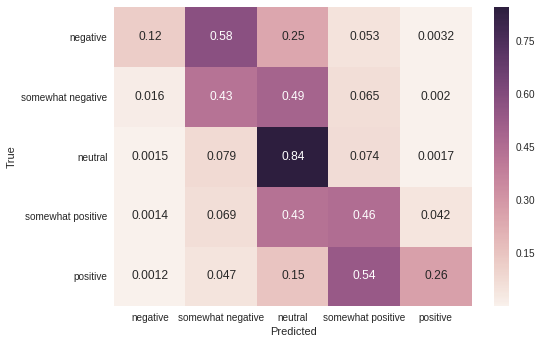

In [0]:
def get_predictions(estimator, input_fn):
  return [x["class_ids"][0] for x in estimator.predict(input_fn=input_fn)]

# Create a confusion matrix on training data.
with tf.Graph().as_default():
  cm = tf.confusion_matrix(train_df["Sentiment"],
                           get_predictions(estimator, predict_train_input_fn))
  with tf.Session() as session:
    cm_out = session.run(cm)

# Normalize the confusion matrix so that each row sums to 1.
cm_out = cm_out.astype(float) / cm_out.sum(axis=1)[:, np.newaxis]

sns.heatmap(
    cm_out,
    annot=True,
    xticklabels=SENTIMENT_LABELS,
    yticklabels=SENTIMENT_LABELS)
plt.xlabel("Predicted")
plt.ylabel("True")

# Transfer Learning with TensorFlow => IMG


In [0]:
# imports... !pip install 

## Imp

In [0]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import collections
import math
import os
import random
from six.moves import urllib

from IPython.display import clear_output, Image, display, HTML
# from StringIO import StringIO   # Python2
from io import StringIO  # Python3

import tensorflow as tf
import tensorflow_hub as hub

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as sk_metrics
import time

In [0]:
#@title Define some helper functions [RUN ME!]
FLOWERS_DIR = './flower_photos'
TRAIN_FRACTION = 0.8
RANDOM_SEED = 2018


def download_images():
  """If the images aren't already downloaded, save them to FLOWERS_DIR."""
  if not os.path.exists(FLOWERS_DIR):
    DOWNLOAD_URL = 'http://download.tensorflow.org/example_images/flower_photos.tgz'
    print('Downloading flower images from %s...' % DOWNLOAD_URL)
    urllib.request.urlretrieve(DOWNLOAD_URL, 'flower_photos.tgz')
    !tar xfz flower_photos.tgz
  print('Flower photos are located in %s' % FLOWERS_DIR)


def make_train_and_test_sets():
  """Split the data into train and test sets and get the label classes."""
  train_examples, test_examples = [], []
  shuffler = random.Random(RANDOM_SEED)
  is_root = True
  for (dirname, subdirs, filenames) in tf.gfile.Walk(FLOWERS_DIR):
    # The root directory gives us the classes
    if is_root:
      subdirs = sorted(subdirs)
      classes = collections.OrderedDict(enumerate(subdirs))
      label_to_class = dict([(x, i) for i, x in enumerate(subdirs)])
      is_root = False
    # The sub directories give us the image files for training.
    else:
      filenames.sort()
      shuffler.shuffle(filenames)
      full_filenames = [os.path.join(dirname, f) for f in filenames]
      label = dirname.split('/')[-1]
      label_class = label_to_class[label]
      # An example is the image file and it's label class.
      #examples = zip(full_filenames, [label_class] * len(filenames))
      #Python 2, zip returned a list. In Python 3, zip returns an iterable object. 
      #But you can make it into a list just by calling list. ext(zip(*ngram))
      
      examples = list(zip(full_filenames, [label_class] * len(filenames)))
      
      
      
      num_train = int(len(filenames) * TRAIN_FRACTION)
      train_examples.extend(examples[:num_train])
      test_examples.extend(examples[num_train:])

  shuffler.shuffle(train_examples)
  shuffler.shuffle(test_examples)
  return train_examples, test_examples, classes


def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for node in graph_def.node:
        stripped_node = strip_def.node.add()
        stripped_node.MergeFrom(node)
        if stripped_node.op == 'Const':
            tensor = stripped_node.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = "<stripped %d bytes>"%size
    return strip_def


def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:1200px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))

In [9]:
# Download the images and split the images into train and test sets.
download_images()
TRAIN_EXAMPLES, TEST_EXAMPLES, CLASSES = make_train_and_test_sets()
NUM_CLASSES = len(CLASSES)

print('\nThe dataset has %d label classes: %s' % (NUM_CLASSES, CLASSES.values()))
print('There are %d training images' % len(TRAIN_EXAMPLES))
print('there are %d test images' % len(TEST_EXAMPLES))

Flower photos are located in ./flower_photos

The dataset has 5 label classes: odict_values(['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips'])
There are 2934 training images
there are 736 test images


## Explore data

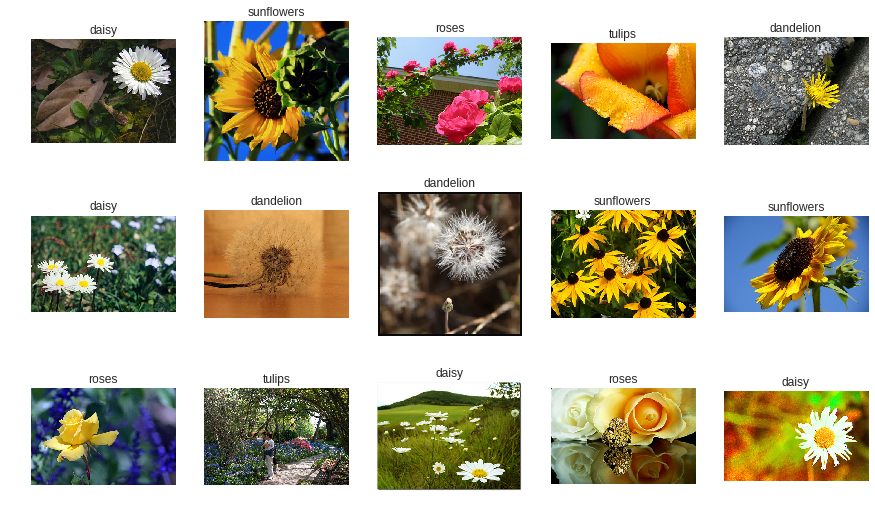

In [17]:
#@title Show some labeled images

from io import StringIO  # Python3
from io import BytesIO  # Python3


def get_label(example):
  """Get the label (number) for given example."""
  return example[1]

def get_class(example):
  """Get the class (string) of given example."""
  return CLASSES[get_label(example)]

def get_encoded_image(example):
  """Get the image data (encoded jpg) of given example."""
  image_path = example[0]
  return tf.gfile.FastGFile(image_path, 'rb').read()

def get_image(example):
  """Get image as np.array of pixels for given example."""
  #return plt.imread( StringIO(get_encoded_image(example)) , format='jpg')
  return plt.imread( BytesIO(get_encoded_image(example)) , format='jpg')


def display_images(images_and_classes, cols=5):
  """Display given images and their labels in a grid."""
  rows = int(math.ceil(len(images_and_classes) / cols))
  fig = plt.figure()
  fig.set_size_inches(cols * 3, rows * 3)
  for i, (image, flower_class) in enumerate(images_and_classes):
    plt.subplot(rows, cols, i + 1)
    plt.axis('off')
    plt.imshow(image)
    plt.title(flower_class)

NUM_IMAGES = 15 #@param {type: 'integer'}
display_images([(get_image(example), get_class(example))
               for example in TRAIN_EXAMPLES[:NUM_IMAGES]])

## model

In [18]:
LEARNING_RATE = 0.01

tf.reset_default_graph()

# Load a pre-trained TF-Hub module for extracting features from images. We've
# chosen this particular module for speed, but many other choices are available.
image_module = hub.Module('https://tfhub.dev/google/imagenet/mobilenet_v2_035_128/feature_vector/2')

# Preprocessing images into tensors with size expected by the image module.
encoded_images = tf.placeholder(tf.string, shape=[None])
image_size = hub.get_expected_image_size(image_module)


def decode_and_resize_image(encoded):
  decoded = tf.image.decode_jpeg(encoded, channels=3)
  decoded = tf.image.convert_image_dtype(decoded, tf.float32)
  return tf.image.resize_images(decoded, image_size)


batch_images = tf.map_fn(decode_and_resize_image, encoded_images, dtype=tf.float32)

# The image module can be applied as a function to extract feature vectors for a
# batch of images.
features = image_module(batch_images)


def create_model(features):
  """Build a model for classification from extracted features."""
  # Currently, the model is just a single linear layer. You can try to add
  # another layer, but be careful... two linear layers (when activation=None)
  # are equivalent to a single linear layer. You can create a nonlinear layer
  # like this:
  # layer = tf.layers.dense(inputs=..., units=..., activation=tf.nn.relu)
  layer = tf.layers.dense(inputs=features, units=NUM_CLASSES, activation=None)
  return layer


# For each class (kind of flower), the model outputs some real number as a score
# how much the input resembles this class. This vector of numbers is often
# called the "logits".
logits = create_model(features)
labels = tf.placeholder(tf.float32, [None, NUM_CLASSES])

# Mathematically, a good way to measure how much the predicted probabilities
# diverge from the truth is the "cross-entropy" between the two probability
# distributions. For numerical stability, this is best done directly from the
# logits, not the probabilities extracted from them.
cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=labels)
cross_entropy_mean = tf.reduce_mean(cross_entropy)

# Let's add an optimizer so we can train the network.
optimizer = tf.train.GradientDescentOptimizer(learning_rate=LEARNING_RATE)
train_op = optimizer.minimize(loss=cross_entropy_mean)

# The "softmax" function transforms the logits vector into a vector of
# probabilities: non-negative numbers that sum up to one, and the i-th number
# says how likely the input comes from class i.
probabilities = tf.nn.softmax(logits)

# We choose the highest one as the predicted class.
prediction = tf.argmax(probabilities, 1)
correct_prediction = tf.equal(prediction, tf.argmax(labels, 1))

# The accuracy will allow us to eval on our test set. 
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Show the created TF graph.
show_graph(tf.get_default_graph())

INFO:tensorflow:Using /tmp/tfhub_modules to cache modules.
INFO:tensorflow:Downloading TF-Hub Module 'https://tfhub.dev/google/imagenet/mobilenet_v2_035_128/feature_vector/2'.
INFO:tensorflow:Downloaded TF-Hub Module 'https://tfhub.dev/google/imagenet/mobilenet_v2_035_128/feature_vector/2'.
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


## train

In [19]:
# How long will we train the network (number of batches).
NUM_TRAIN_STEPS = 100 #@param {type: 'integer'}
# How many training examples we use in each step.
TRAIN_BATCH_SIZE = 10 #@param {type: 'integer'}
# How often to evaluate the model performance.
EVAL_EVERY = 10 #@param {type: 'integer'}

def get_batch(batch_size=None, test=False):
  """Get a random batch of examples."""
  examples = TEST_EXAMPLES if test else TRAIN_EXAMPLES
  batch_examples = random.sample(examples, batch_size) if batch_size else examples
  return batch_examples

def get_images_and_labels(batch_examples):
  images = [get_encoded_image(e) for e in batch_examples]
  one_hot_labels = [get_label_one_hot(e) for e in batch_examples]
  return images, one_hot_labels

def get_label_one_hot(example):
  """Get the one hot encoding vector for the example."""
  one_hot_vector = np.zeros(NUM_CLASSES)
  np.put(one_hot_vector, get_label(example), 1)
  return one_hot_vector

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  for i in range(NUM_TRAIN_STEPS):
    # Get a random batch of training examples.
    train_batch = get_batch(batch_size=TRAIN_BATCH_SIZE)
    batch_images, batch_labels = get_images_and_labels(train_batch)
    # Run the train_op to train the model.
    train_loss, _, train_accuracy = sess.run(
        [cross_entropy_mean, train_op, accuracy],
        feed_dict={encoded_images: batch_images, labels: batch_labels})
    is_final_step = (i == (NUM_TRAIN_STEPS - 1))
    if i % EVAL_EVERY == 0 or is_final_step:
      # Get a batch of test examples.
      test_batch = get_batch(batch_size=None, test=True)
      batch_images, batch_labels = get_images_and_labels(test_batch)
      # Evaluate how well our model performs on the test set.
      test_loss, test_accuracy, test_prediction, correct_predicate = sess.run(
        [cross_entropy_mean, accuracy, prediction, correct_prediction],
        feed_dict={encoded_images: batch_images, labels: batch_labels})
      print('Test accuracy at step %s: %.2f%%' % (i, (test_accuracy * 100)))

Test accuracy at step 0: 23.51%
Test accuracy at step 10: 47.69%
Test accuracy at step 20: 66.30%
Test accuracy at step 30: 72.28%
Test accuracy at step 40: 73.51%
Test accuracy at step 50: 75.95%
Test accuracy at step 60: 76.22%
Test accuracy at step 70: 77.04%
Test accuracy at step 80: 77.45%
Test accuracy at step 90: 78.53%
Test accuracy at step 99: 79.76%


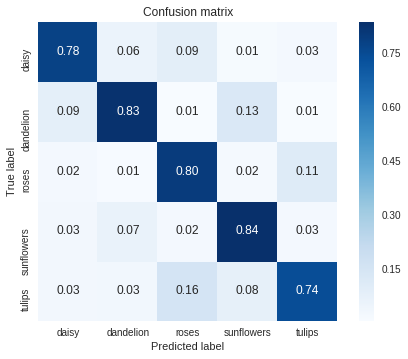

In [22]:
def show_confusion_matrix(test_labels, predictions):
  """Compute confusion matrix and normalize."""
  confusion = sk_metrics.confusion_matrix(
    np.argmax(test_labels, axis=1), predictions)
  confusion_normalized = confusion.astype("float") / confusion.sum(axis=1)
  axis_labels = list(CLASSES.values())
  ax = sns.heatmap(
      confusion_normalized, xticklabels=axis_labels, yticklabels=axis_labels,
      cmap='Blues', annot=True, fmt='.2f', square=True)
  plt.title("Confusion matrix")
  plt.ylabel("True label")
  plt.xlabel("Predicted label")

show_confusion_matrix(batch_labels, test_prediction)

## Incorrect predictions

Let's a take a closer look at the test examples that our model got wrong.

- Are there any mislabeled examples in our test set?
- Is there any bad data in the test set - images that aren't actually pictures of flowers?
- Are there images where you can understand why the model made a mistake?

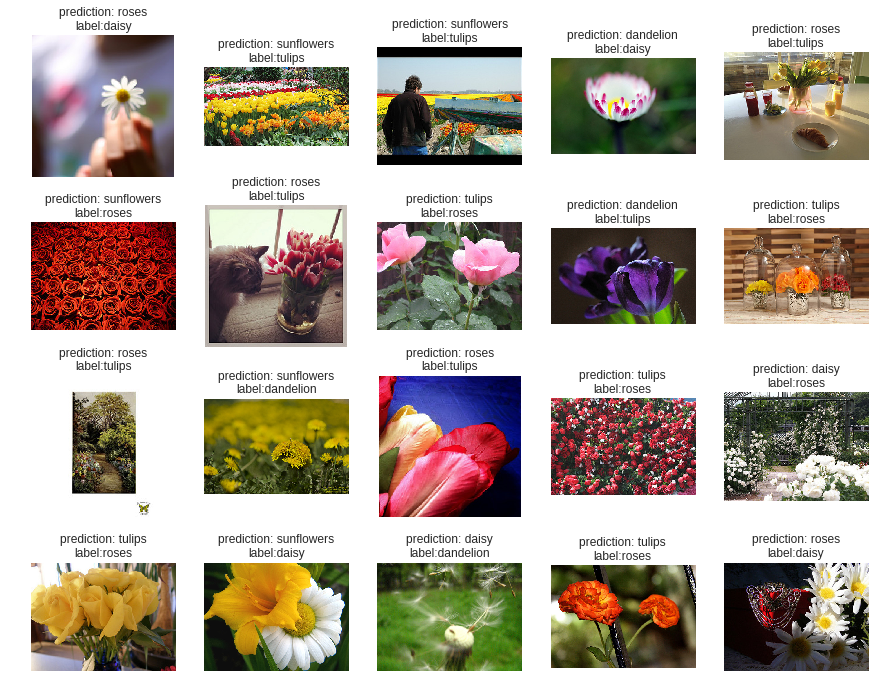

In [21]:
incorrect = [
    (example, CLASSES[prediction])
    for example, prediction, is_correct in zip(test_batch, test_prediction, correct_predicate)
    if not is_correct
]
display_images(
  [(get_image(example), "prediction: {0}\nlabel:{1}".format(incorrect_prediction, get_class(example)))
   for (example, incorrect_prediction) in incorrect[:20]])

## Exercises: Improve the model!

We've trained a baseline model, now let's try to improve it to achieve better accuracy. (Remember that you'll need to re-run the cells when you make a change.)

### Exercise 1:  Try a different image model.
With TF-Hub, trying a few different image models is simple. Just replace the `"https://tfhub.dev/google/imagenet/mobilenet_v2_050_128/feature_vector/2"` handle in the `hub.Module()` call with a handle of different module and rerun all the code. You can see all available image modules at [tfhub.dev](https://tfhub.dev/s?module-type=image-feature-vector). 

A good choice might be one of the other [MobileNet V2 modules](https://tfhub.dev/s?module-type=image-feature-vector&network-architecture=mobilenet-v2). Many of the modules -- including the MobileNet modules -- were trained on the [ImageNet dataset](http://image-net.org/challenges/LSVRC/2012/index#task) which contains over 1 million images and 1000 classes. Choosing a network architecture provides a tradeoff between speed and classification accuracy: models like MobileNet or NASNet Mobile are fast and small, more traditional architectures like Inception and ResNet were designed for accuracy.

For the larger Inception V3 architecture, you can also explore the benefits of pre-training on a domain closer to your own task: it is also available as a [module trained on the iNaturalist dataset](https://tfhub.dev/google/inaturalist/inception_v3/feature_vector/1) of plants and animals.

### Exercise 2: Add a hidden layer.
Stack a hidden layer between extracted image features and the linear classifier (in function `create_model()` above). To create a non-linear hidden layer with e.g. 100 nodes, use  [tf.layers.dense](https://www.tensorflow.org/api_docs/python/tf/layers/dense) with units set to 100 and activation set to `tf.nn.relu`. Does changing the size of the hidden layer affect the test accuracy? Does adding second hidden layer improve the accuracy?

### Exercise 3: Change hyperparameters.
Does increasing  *number of training steps*  improves final accuracy? Can you *change the learning rate* to make your model converge more quickly? Does the training *batch size* affect your model's performance?

### Exercise 4: Try a different optimizer.

Replace the basic GradientDescentOptimizer with a more sophisticate [optimizer](https://www.tensorflow.org/api_guides/python/train#Optimizers), e.g.  [AdagradOptimizer](https://www.tensorflow.org/api_docs/python/tf/train/AdagradOptimizer). Does it make a difference to your model training? If you want to learn more about the benefits of different optimization algorithms, check out [this post](http://ruder.io/optimizing-gradient-descent/).

## Want to learn more?

If you are interested in a more advanced version of this tutorial, check out the [TensorFlow image retraining tutorial](https://www.tensorflow.org/hub/tutorials/image_retraining) which walks you through visualizing the training using TensorBoard, advanced techniques like dataset augmentation by distorting images, and replacing the flowers dataset to learn an image classifier on your own dataset.

You can learn more about TensorFlow at [tensorflow.org](http://tensorflow.org) and see the TF-Hub API documentation is available at [tensorflow.org/hub](https://www.tensorflow.org/hub/). Find available TensorFlow Hub modules at [tfhub.dev](http://tfhub.dev) including more image feature vector modules and text embedding modules.

Also check out the [Machine Learning Crash Course](https://developers.google.com/machine-learning/crash-course/) which is Google's fast-paced, practical introduction to machine learning.

# other